# Problem Statement and Hypothesis Generation

>*Given the features that contain the customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month, the aim is to build a predictive model to determine the purchase amount of customer against various products which will help them to create personalized offer for customers against different products..* 

$H_{0}$ : None of the variables (below)contributes significantly to the prediction of the model.

$H_{1}$ : At least one of the variables (below) contribute significantly impact on the dependent variable.

| Variables | Definition   |
|------|------|
| User_ID | User ID |
| Product_ID | Product ID |
| Gender |	Sex of User |
| Age |	Age in bins |
| Occupation |	Occupation (Masked)|
| City_Category |	Category of the City (A,B,C)|
| Stay_In_Current_City_Years |	Number of years stay in current city |
| Marital_Status |	Marital Status |
| Product_Category_1 |	Product Category (Masked) |
| Product_Category_2 |	Product may belongs to other category also (Masked) |
| Product_Category_3 |	Product may belongs to other category also (Masked) |
| Purchase |	Purchase Amount (Target Variable)|

# Data Exploration

In [1]:
import os
import glob
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import numpy as np
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_rows',9)
pd.set_option('display.max_columns', 9)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

## Importing the Train Data-Set

In [2]:
df_test = pd.read_csv('test_mod_tableau.csv')
df_train_2 = pd.read_csv('train_mod_tableau.csv')
df_test = df_test.fillna(0)
df_train_2 = df_train_2.fillna(0)

In [3]:
df_train_2

,User ID,Age,City Category,Stay In Current City Years,...,18,19,20,Total Purchase
0,1000001,0-17,A,2,...,0.0,0.0,1.0,334093
1,1000002,55+,C,4+,...,0.0,0.0,1.0,810472
2,1000003,26-35,A,3,...,1.0,0.0,0.0,341635
3,1000004,46-50,B,2,...,0.0,0.0,1.0,206468
...,...,...,...,...,...,...,...,...,...
5887,1006037,46-50,C,4+,...,1.0,0.0,0.0,1119538
5888,1006038,55+,C,2,...,0.0,0.0,1.0,90034
5889,1006039,46-50,B,4+,...,0.0,0.0,1.0,590319
5890,1006040,26-35,B,2,...,0.0,0.0,0.0,1653299


In [5]:
df_train_2['Gender'] = df_train_2.Gender.map({'F': 0 , 'M': 1})

### Analysing the Variable Age

As we can see, the data set consists of people aged from 0 to 55+ with frequency of people declining with age. Now, if we think of the problem we are trying to solve, the population between ages of 26 to 35 appear to spend more than the other groups. Given us an incentive to think that targeting young adults might be good marketing strategy.

Also, it highlights that for ages inside these categories "0-17", "46-50", "51-55" and "55+" its total purchase is lower than \$500,000,000.00 and that the probabily of belonging to any of these categories compare to the other categories surpass the quote. So, to reduce the complexity of the model I will classify the categories that belong to Age in 0 for the total purchase below \$500,000,000.00 and 1 for the contrary.

In [6]:
pd.crosstab(index = df_train_2["Age"], columns="Frequency")/df_train_2["Age"].count()

col_0,Frequency
Age,
0-17,0.037006
18-25,0.181463
26-35,0.348498
36-45,0.198099
46-50,0.090137
51-55,0.081650
55+,0.063147


In [8]:
df_train_2[['Age','Total Purchase']].groupby(['Age']).median()

,Total Purchase
Age,
0-17,404567
18-25,537636
26-35,614063
36-45,525902
46-50,466398
51-55,457415
55+,332731


In [ ]:
dummies = pd.get_dummies(df_train_2['Age'])
dummies = dummies.drop(['0-17'],axis = 1)
df_train_2 = pd.concat([df_train_2, dummies], axis=1)

### Analysing the Variable Occupation with the Age in function of the total Purchase

The bar chart below deals with the Total Purchase of every group of Age in the occupation in which they are in. It helps identify if any trend exist or if there is a possibilty of an outlier. 

Looking at the graph, the number total of purchase for people with the occupation "4" and that belong to the range of Age of 18-25 increases dramatically compared to the other purchase of the people that share the same traits. Can it be an outlier? Further analysis must be needed to get to a more concrete conclusion about the fate of the data in question.



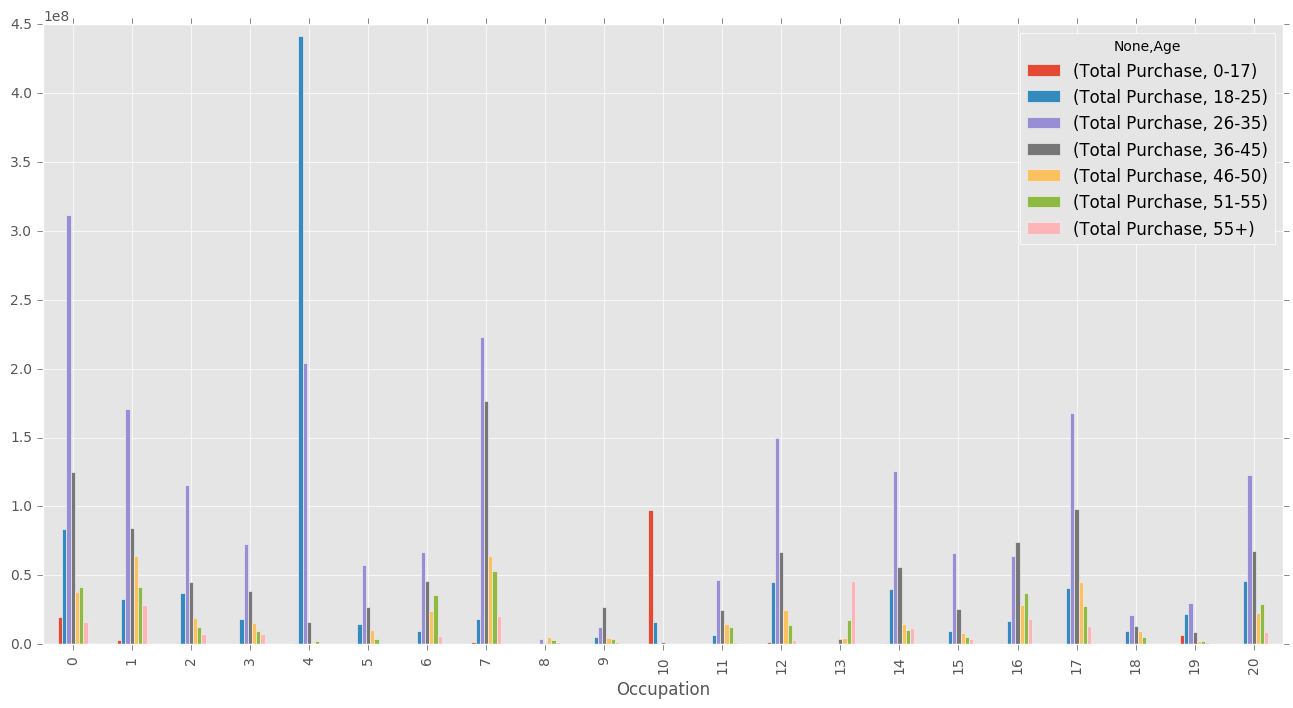

In [9]:
df_bar = df_train_2[['Occupation','Age','Total Purchase']].groupby(['Occupation','Age']).sum()
df_bar = df_bar.unstack()
df_bar.plot(kind='bar',figsize = (16, 8))

In [10]:
dummies = pd.get_dummies(df_train_2['Occupation'],prefix = 'Occupation')
dummies = dummies.drop(['Occupation_8'],axis = 1)
df_train_2 = pd.concat([df_train_2, dummies], axis=1)

### Creating dummies variables for the City Category

In [12]:
dummies = pd.get_dummies(df_train_2['City Category'])
dummies = dummies.drop(['C'],axis = 1)
df_train_2 = pd.concat([df_train_2, dummies], axis=1)

### Creating dummies variables for the Current Stayed in Years

In [15]:
df_train_2['Stay In Current City Years'] = df_train_2['Stay In Current City Years'].map({'0': 0 , '1': 1, '2': 2, '3': 3,'4+': 4})

In [17]:
df_train_2[['Stay In Current City Years','Total Purchase']].groupby(['Stay In Current City Years']).mean()

,Total Purchase
Stay In Current City Years,
0,884688
1,859478
2,828972
3,903884
4,864559


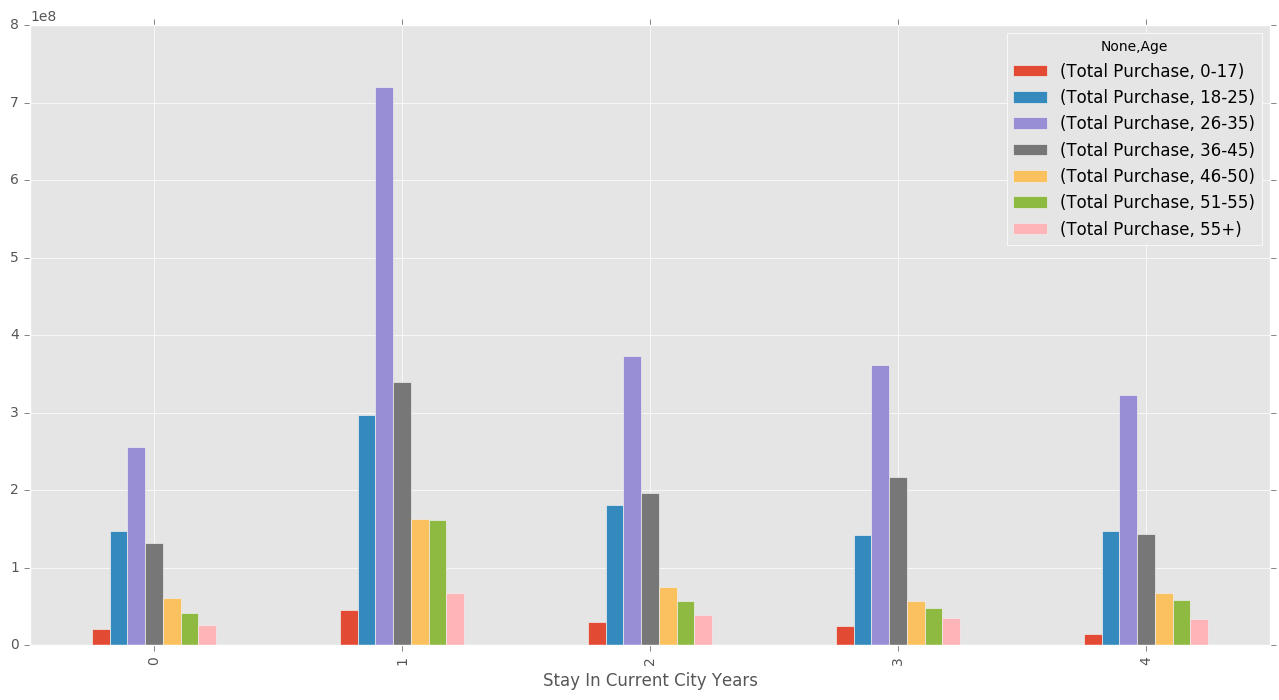

In [18]:
df_bar = df_train_2[['Stay In Current City Years','Age','Total Purchase']].groupby(['Stay In Current City Years','Age']).sum()
df_bar = df_bar.unstack()
df_bar.plot(kind='bar',figsize = (16, 8))

In [19]:
dummies = pd.get_dummies(df_train_2['Stay In Current City Years'],prefix = 'Years_Stayed')
dummies = dummies.drop(['Years_Stayed_0'],axis = 1)
df_train_2 = pd.concat([df_train_2, dummies], axis=1)

# Defining the response and predictive values

In [20]:
X = df_train_2[['1','5','8']]
y = df_train_2['Total Purchase']

## Fitting Random Forest Regression to the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = np.asarray(y_test)

In [22]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [23]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. 1 (0.649656)
2. 8 (0.207013)
3. 5 (0.143330)


In [24]:
regressor.score(X_test, y_test)

0.94229114498105093

In [25]:
y_hat = regressor.predict(X_test)
MSE = y_test-y_hat
MSE = MSE*MSE
MSE = sum(MSE)
MSE = MSE/len(y_test)
RMSE = MSE**(1./2)
RMSE

243618.40613431612

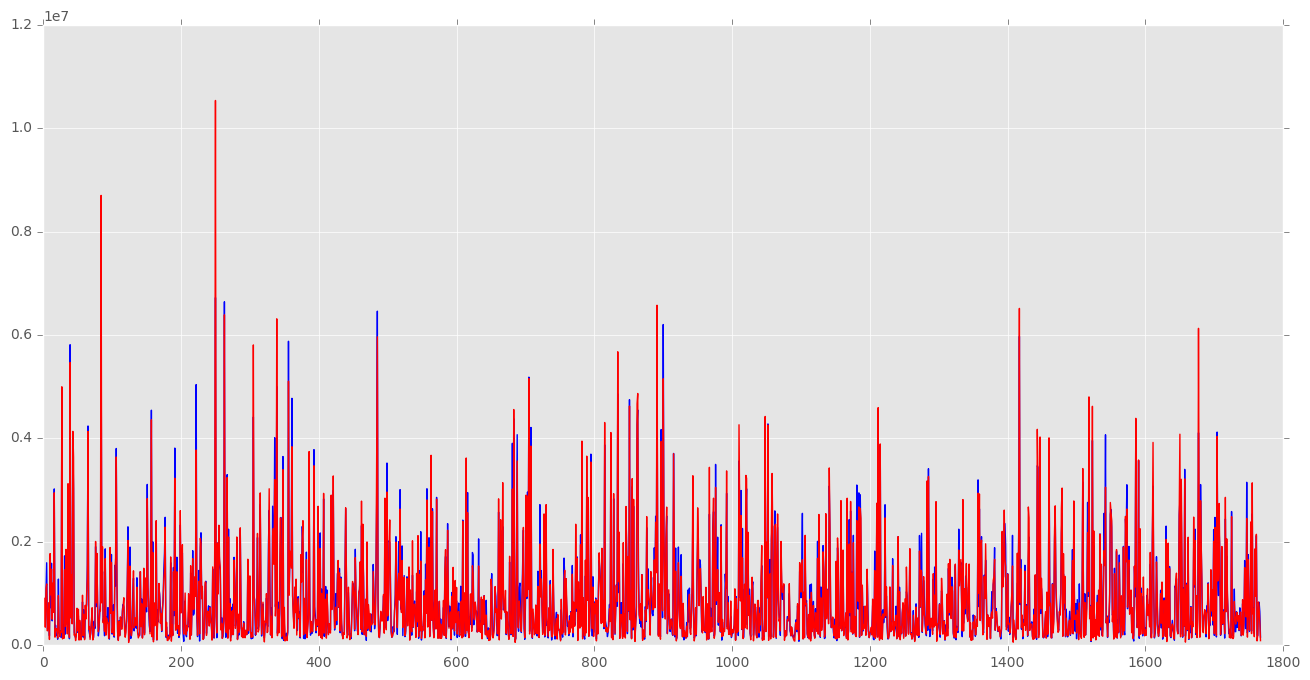

In [26]:
plt.figure(figsize=(16,8))
plt.plot(y_hat,'b') 
plt.plot(y_test,'r') 
plt.show()


# Predicting new values for the Test Data Frame

In [28]:
X_real = df_test[['1','5','8']]

In [36]:
Purchase_Prediction = regressor.predict(X_real)
Purchase_Prediction = pd.DataFrame(
    {'Purchase_Prediction': Purchase_Prediction,
    })

In [ ]:
Purchase_Prediction  = Purchase_Prediction.tolist()

In [42]:
df_test.join(Purchase_Prediction)

,User ID,Stay In Current City Years,Occupation,Age,...,16,17,18,Purchase_Prediction
0,1000001,2,10,0-17,...,0.0,0.0,0.0,119545.374167
1,1000002,4+,16,55+,...,0.0,0.0,0.0,447563.940000
2,1000003,3,15,26-35,...,0.0,0.0,0.0,152658.877833
3,1000004,2,7,46-50,...,0.0,0.0,0.0,273359.425381
...,...,...,...,...,...,...,...,...,...
5887,1006037,4+,1,46-50,...,2.0,0.0,0.0,394926.150000
5888,1006038,2,1,55+,...,0.0,0.0,0.0,112650.318881
5889,1006039,4+,0,46-50,...,0.0,0.0,0.0,179875.923333
5890,1006040,2,6,26-35,...,1.0,0.0,0.0,929470.783333
